# Explore a DataFrame

Use this template to get a solid understanding of the structure of your DataFrame and its values before jumping into a deeper analysis. This template leverages many of pandas' handy functions for the most fundamental exploratory data analysis steps, including inspecting column data types and distributions, creating exploratory visualizations, and counting unique and missing values. 

In [1]:
import pandas as pd
import seaborn as sn
import matplotlib.pyplot as plt

# Load your dataset into a DataFrame
df = pd.read_csv("data/taxis.csv")

# Print the number of rows and columns
print("Number of rows and columns:", df.shape)

# Print out the first five rows
df.head()

Number of rows and columns: (6433, 14)


,pickup,dropoff,passengers,distance,fare,tip,tolls,total,color,payment,pickup_zone,dropoff_zone,pickup_borough,dropoff_borough
0,2019-03-23 20:21:09,2019-03-23 20:27:24,1,1.60,7.0,2.15,0.0,12.95,yellow,credit card,Lenox Hill West,UN/Turtle Bay South,Manhattan,Manhattan
1,2019-03-04 16:11:55,2019-03-04 16:19:00,1,0.79,5.0,0.00,0.0,9.30,yellow,cash,Upper West Side South,Upper West Side South,Manhattan,Manhattan
2,2019-03-27 17:53:01,2019-03-27 18:00:25,1,1.37,7.5,2.36,0.0,14.16,yellow,credit card,Alphabet City,West Village,Manhattan,Manhattan
3,2019-03-10 01:23:59,2019-03-10 01:49:51,1,7.70,27.0,6.15,0.0,36.95,yellow,credit card,Hudson Sq,Yorkville West,Manhattan,Manhattan
4,2019-03-30 13:27:42,2019-03-30 13:37:14,3,2.16,9.0,1.10,0.0,13.40,yellow,credit card,Midtown East,Yorkville West,Manhattan,Manhattan


## Understanding columns and values

The [info()](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.info.html) function prints a concise summary of the DataFrame. For each column, you can find its name, data type, and the number of non-null rows.  This is useful to gauge if there are many missing values and to understand what data types you're dealing with. 

In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6433 entries, 0 to 6432
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   pickup           6429 non-null   object 
 1   dropoff          6429 non-null   object 
 2   passengers       6433 non-null   int64  
 3   distance         6430 non-null   float64
 4   fare             6433 non-null   float64
 5   tip              6432 non-null   float64
 6   tolls            6431 non-null   float64
 7   total            6433 non-null   float64
 8   color            6431 non-null   object 
 9   payment          6387 non-null   object 
 10  pickup_zone      6404 non-null   object 
 11  dropoff_zone     6388 non-null   object 
 12  pickup_borough   6405 non-null   object 
 13  dropoff_borough  6388 non-null   object 
dtypes: float64(5), int64(1), object(8)
memory usage: 703.7+ KB


To get an exact count of missing values in each column, call the [isna()](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.isna.html) function and aggregate it using the [sum()](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.sum.html) function:

In [3]:
df.isna().sum()

pickup              4
dropoff             4
passengers          0
distance            3
fare                0
tip                 1
tolls               2
total               0
color               2
payment            46
pickup_zone        29
dropoff_zone       45
pickup_borough     28
dropoff_borough    45
dtype: int64

If there are missing values, you'll have to decide if and how missing values should be dealt with. If you want to learn more about removing and replacing values, check out chapter 2 of DataCamp's [Data Manipulation with pandas](https://app.datacamp.com/learn/courses/data-manipulation-with-pandas) course.


The [describe()](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.describe.html) function generates helpful descriptive statistics for each numeric column. You can see the percentile, mean, standard deviation, and minimum and maximum values in its output. Note that missing values are excluded here.

In [4]:
df.describe()

,passengers,distance,fare,tip,tolls,total
count,6433.000000,6430.000000,6433.000000,6432.000000,6431.000000,6433.000000
mean,1.539251,3.023526,13.091073,1.979176,0.325374,18.517794
std,1.203768,3.827513,11.551804,2.448747,1.415476,13.815570
min,0.000000,0.000000,1.000000,0.000000,0.000000,1.300000
25%,1.000000,0.980000,6.500000,0.000000,0.000000,10.800000
50%,1.000000,1.640000,9.500000,1.700000,0.000000,14.160000
75%,2.000000,3.210000,15.000000,2.800000,0.000000,20.300000
max,6.000000,36.700000,150.000000,33.200000,24.020000,174.820000


Use the [`unique()`](https://pandas.pydata.org/docs/reference/api/pandas.unique.html) function to print out the unique values of a column:

In [5]:
df["pickup_borough"].unique()  # Replace with a column of interest

array(['Manhattan', 'Queens', nan, 'Bronx', 'Brooklyn'], dtype=object)

Use the [`value_counts()`](https://pandas.pydata.org/docs/reference/api/pandas.Series.value_counts.html) function to print out the number of rows for each unique value:

In [6]:
df["pickup_borough"].value_counts(  # Replace with a column of interest
    dropna=True  # Set to False if you want to include NaN values
)

pickup_borough
Manhattan    5266
Queens        657
Brooklyn      383
Bronx          99
Name: count, dtype: int64

## Basic data visualizations

pandas' [plot()](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.plot.html) function makes it easy to plot columns from your DataFrame. This section will go through a few basic data visualizations to better understand your data. If you need a refresher on visualizing DataFrames, chapter 4 of DataCamp's [Data Manipulation with pandas](https://app.datacamp.com/learn/courses/data-manipulation-with-pandas) course is a useful reference!


Boxplots can help you identify outliers:

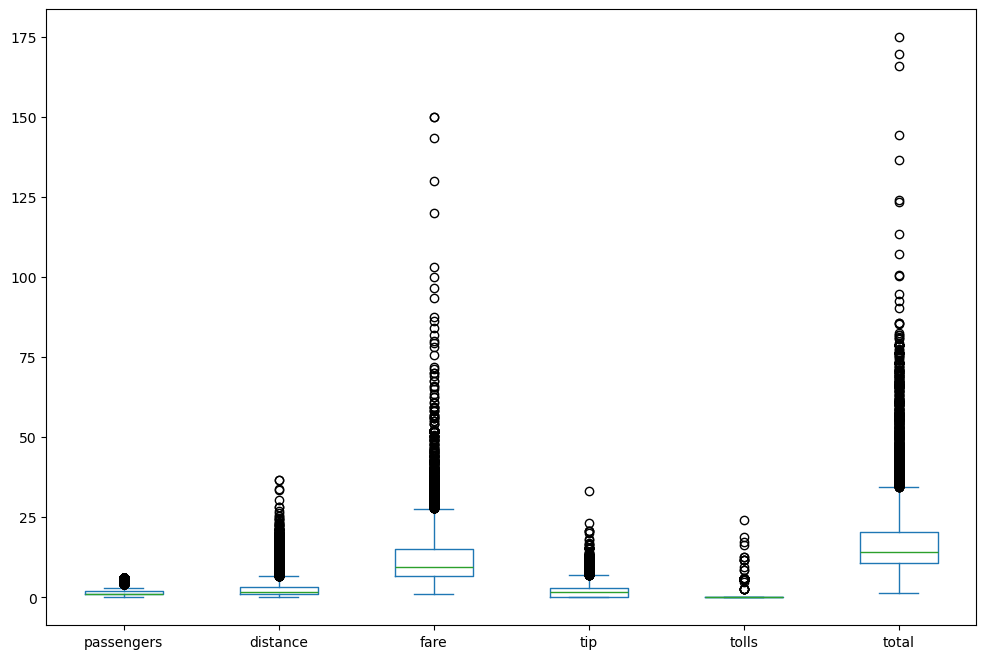

In [7]:
df.plot(
    kind="box", figsize=(12, 8)  # Specifies a boxplot with set width & height in inches
);

To further inspect distribution of data in a column, you can use a histogram:

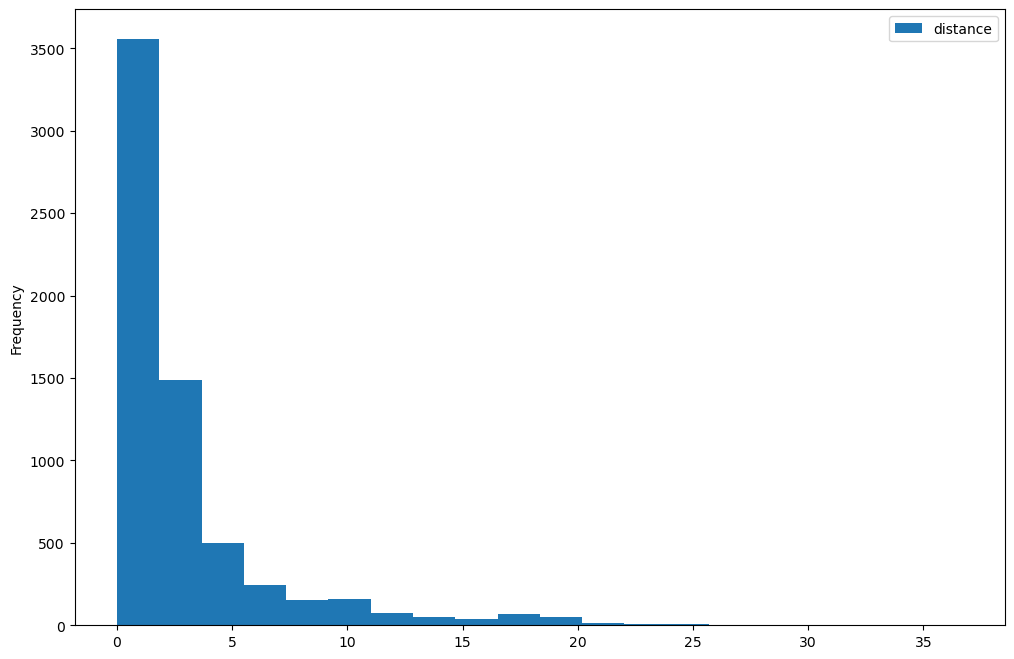

In [8]:
df.plot(
    kind="hist",  # Specifies a histogram
    y="distance",  # Replace with a numeric column of interest
    bins=20,  # Set the number of bins in the histogram
    figsize=(12, 8)  # Set width & height in inches
);

You can use a bar plot to compare averages (and other aggregations!) of a numeric column across a categorical column:

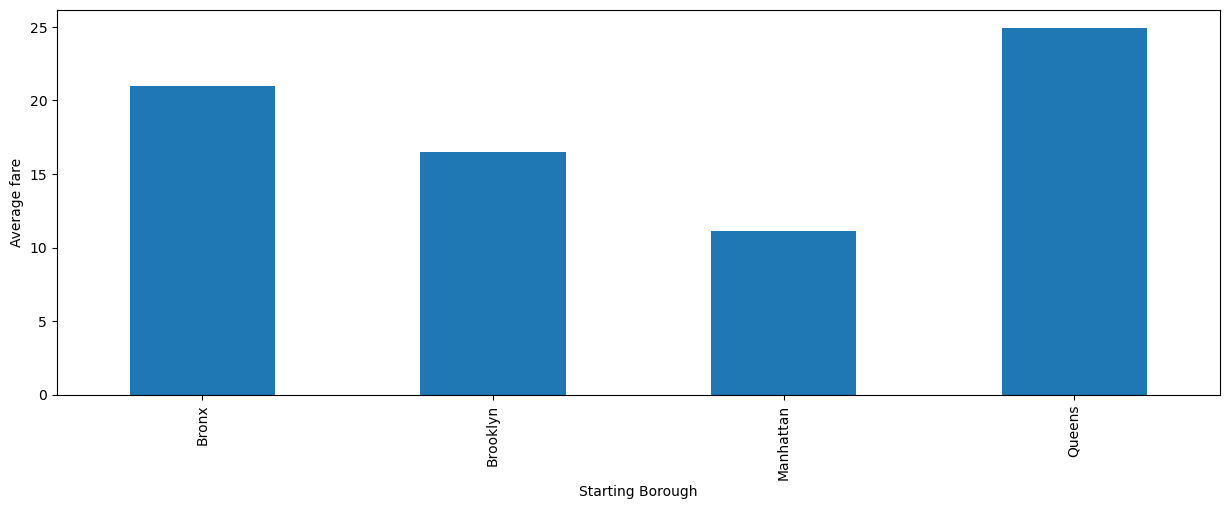

In [9]:
# Create a new DataFrame with a categorical column to group the data and a numeric column to aggregate
# You can also use sum(), count(), and other aggregations instead of mean()
df_bar = df.groupby(["pickup_borough"])["fare"].mean()

df_bar.plot(
    kind="bar",  # Specifies vertical bar plot
    ylabel="Average fare",  # Add a y-axis label
    xlabel="Starting Borough",  # Add a x-axis label
    figsize=(15, 5)  # Set width & height in inches
);

If you have any date columns, you can use a lineplot to find patterns, such as seasonality:

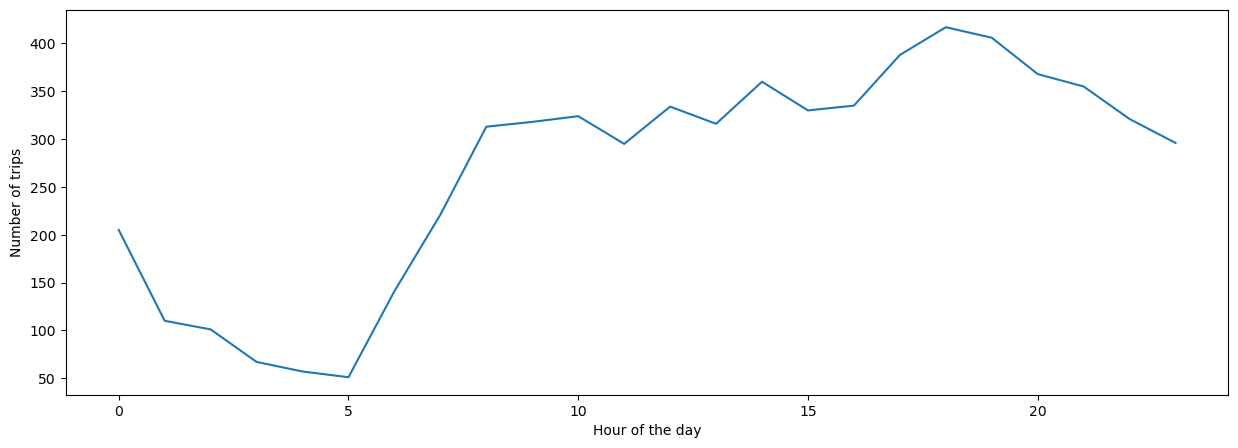

In [10]:
# Convert any date and/or time column to datetime format
df["pickup"] = pd.to_datetime(df["pickup"])

# Create a new DataFrame, group by the datetime column and choose an aggregation
# On the datetime column, choose a time object, options can be found here:
# https://pandas.pydata.org/pandas-docs/stable/user_guide/timeseries.html#time-date-components
df_dates = df["pickup"].groupby([df["pickup"].dt.hour]).count()

df_dates.plot(
    kind="line",  # Specifies line plot
    ylabel="Number of trips",  # Add a y-axis label
    xlabel="Hour of the day",  # Add a x-axis label
    figsize=(15, 5)  # Set width & height in inches
);

Scatter plots are useful to investigate the relationship between two numeric variables:

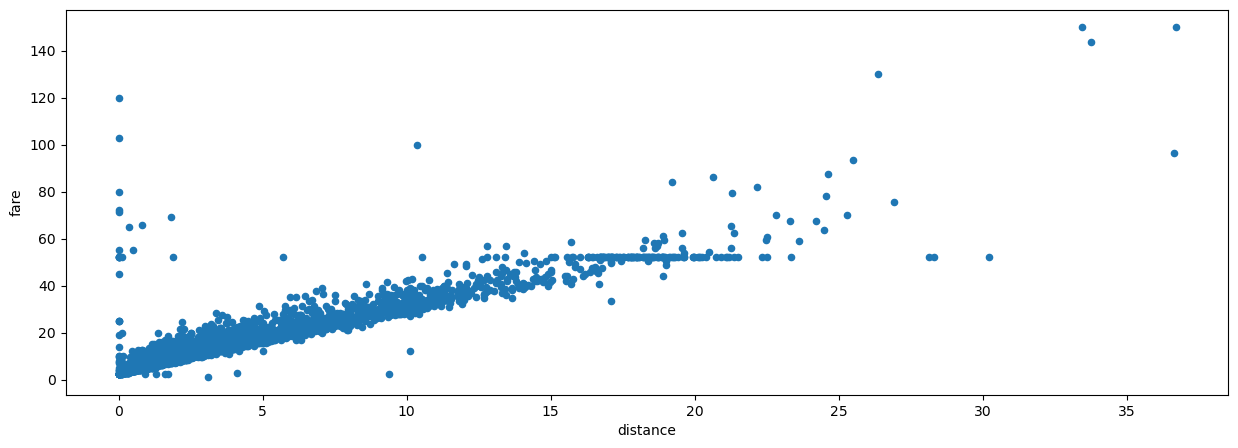

In [11]:
df.plot(
    kind="scatter",  # Specifies a scatter plot
    x="distance",  # Replace with a numeric column for the x-axis
    y="fare",  # Replace with a numeric column for the y-axis
    figsize=(15, 5)  # Set width & height in inches
);

To further explore relationships between columns, generate a correlation matrix using pandas' [corr()](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.corr.html) function and a plot it with Seaborn's [heatmap()](https://seaborn.pydata.org/generated/seaborn.heatmap.html) function.

            passengers  distance      fare       tip     tolls     total
passengers    1.000000  0.009545  0.007637  0.021108 -0.002876  0.015708
distance      0.009545  1.000000  0.920111  0.452276  0.635552  0.904675
fare          0.007637  0.920111  1.000000  0.488630  0.609303  0.974358
tip           0.021108  0.452276  0.488630  1.000000  0.413658  0.646199
tolls        -0.002876  0.635552  0.609303  0.413658  1.000000  0.683137
total         0.015708  0.904675  0.974358  0.646199  0.683137  1.000000


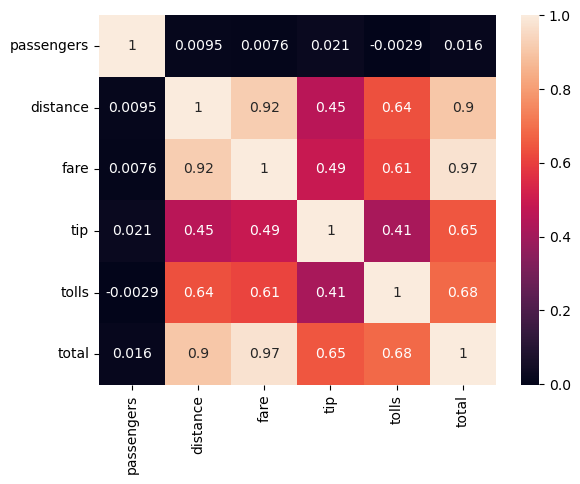

In [12]:
# Generate and print pairwise correlation of columns
cm = df.corr(numeric_only=True)
print(cm)

# Plot the correlation matrix nicely using Seaborn
sn.heatmap(cm, annot=True)
plt.show()

Eager for more visualizations? Take a look at the documentation of the [plot()](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.plot.html) function to see what other visualizations you can make. You can also take DataCamp courses to learn more about powerful Python visualization libraries, such as [matplotlib](https://app.datacamp.com/learn/courses/introduction-to-data-visualization-with-matplotlib), [seaborn](https://app.datacamp.com/learn/courses/introduction-to-data-visualization-with-seaborn), and [plotly](https://app.datacamp.com/learn/courses/introduction-to-data-visualization-with-plotly-in-python)!